<a href="https://colab.research.google.com/github/Amanrai2000/TSF_DataScience/blob/main/tsf_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=”magenta”> Author: Aman Rai </font>

**TASK 1 - Prediction using Supervised ML
To Predict the percentage of a Student based on the no. of study hours they studied**

Working using Python Language on Google Colab Notebook 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  
from sklearn.metrics import r2_score
%matplotlib inline

Importing data from the following link

In [4]:
data_url = "http://bit.ly/w-data"
df = pd.read_csv(data_url)
df.head(12)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Checking if there are any missing data/empty cells in the given dataset.

In [5]:
df.isna().any()

Hours     False
Scores    False
dtype: bool

Since are no empty cells, therefore we can now visualize the data to get better understanding of it.

**Visualizing the given data into a plot.**

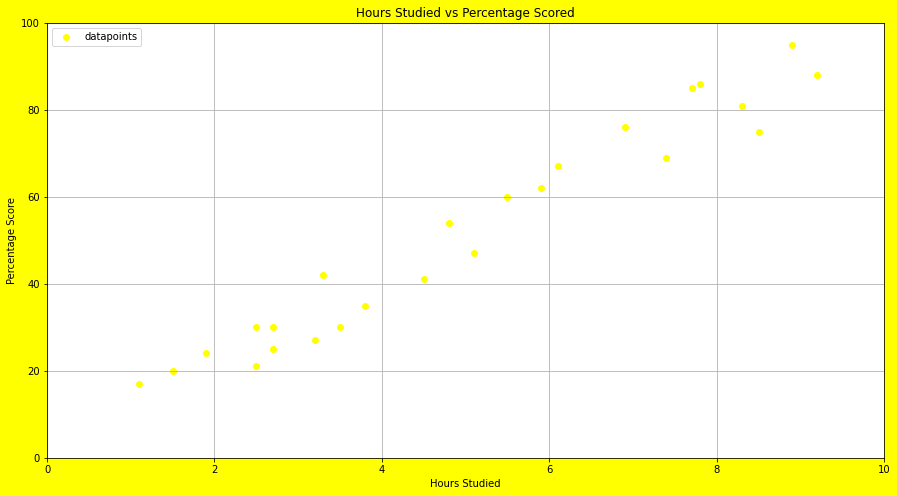

In [11]:
plt.figure(figsize=(15, 8), facecolor='yellow')
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.scatter(df['Hours'], df['Scores'], label = "datapoints", color = "yellow")  
plt.title('Hours Studied vs Percentage Scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.legend()
plt.show()

From the above plot, it can be deduced that there is a clear positive relation between the variables 'Hours Studied' and 'Percentage Score'.

**Spliting the data into attributes and labels**

In [12]:
X = df.iloc[:, :-1].values #Input value to linearRegression is a 2D array 
Y = df.iloc[:, 1].values

In [13]:
X[:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

In [14]:
Y[:5]

array([21, 47, 27, 75, 30])

**Splitting the dataset into training and test sets and then train the model with training set**

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
linearRegression = LinearRegression()  
linearRegression.fit(X_train, Y_train) 
print("Training the model is completed")

Training the model is completed


**Create a regression line for the train data**

In [18]:
data_line = linearRegression.coef_*X+linearRegression.intercept_

**Plot the data around regression line**

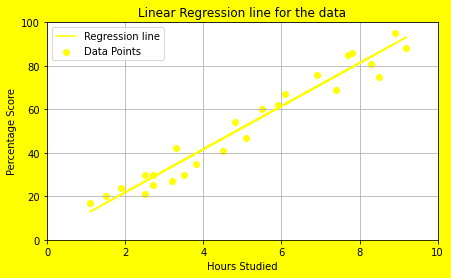

In [20]:
plt.figure(figsize=(7, 4), facecolor='yellow')
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.scatter(X, Y, label = "Data Points", color = "yellow")
plt.plot(X, data_line, label = "Regression line", color = "yellow")
plt.title("Linear Regression line for the data")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.legend()
plt.show()

Test the trained regression model with test data

In [21]:

Y_pred = linearRegression.predict(X_test) # Predicting the scores

**Tabulate actual and predicted values of test set**

In [22]:
pred_data = pd.DataFrame(list(zip(Y_test, Y_pred)),columns=['Actual','Predicted']) 
pred_data.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Plot Predicted values against Actual data to visualize the difference**

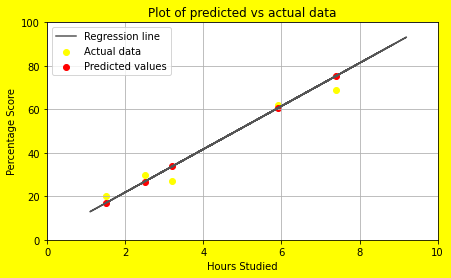

In [25]:
plt.figure(figsize=(7, 4), facecolor='yellow')
plt.xlim(0, 10)
plt.ylim(0, 100)

plt.scatter(X_test, Y_test, c='yellow',  label='Actual data')
plt.scatter(X_test, Y_pred, c='#f00',  label='Predicted values')
plt.plot(X, data_line, label = "Regression line", color = "#555")

plt.title("Plot of predicted vs actual data")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.legend()
plt.show()

**Evaluating the model**

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 
print('r2 score           : {}'.format(r2_score(Y_test, Y_pred)))

Mean Absolute Error: 4.183859899002982
r2 score           : 0.9454906892105354


# **Question: find percent if number of hours = 9.25**

In [27]:
hours = 9.25
number_of_hours = linearRegression.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(number_of_hours[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539
